上⼀章我们介绍了卷积神经⽹络的基本原理，本章将介绍现代的卷积神经⽹络架构，许多现代卷积神经⽹
络的研究都是建⽴在这⼀章的基础上的。在本章中的每⼀个模型都曾⼀度占据主导地位，其中许多模型都
是ImageNet竞赛的优胜者。ImageNet竞赛⾃2010年以来，⼀直是计算机视觉中监督学习进展的指向标。
这些模型包括：

• AlexNet。它是第⼀个在⼤规模视觉竞赛中击败传统计算机视觉模型的⼤型神经⽹络；

• 使⽤重复块的⽹络（VGG）。它利⽤许多重复的神经⽹络块；

• ⽹络中的⽹络（NiN）。它重复使⽤由卷积层和1 × 1卷积层（⽤来代替全连接层）来构建深层⽹络;

• 含并⾏连结的⽹络（GoogLeNet）。它使⽤并⾏连结的⽹络，通过不同窗⼝⼤⼩的卷积层和最⼤汇聚层
来并⾏抽取信息；

• 残差⽹络（ResNet）。它通过残差块构建跨层的数据通道，是计算机视觉中最流⾏的体系架构；

• 稠密连接⽹络（DenseNet）。它的计算成本很⾼，但给我们带来了更好的效果。

虽然深度神经⽹络的概念⾮常简单——将神经⽹络堆叠在⼀起。但由于不同的⽹络架构和超参数选择，这些
神经⽹络的性能会发⽣很⼤变化。本章介绍的神经⽹络是将⼈类直觉和相关数学⻅解结合后，经过⼤量研究
试错后的结晶。我们会按时间顺序介绍这些模型，在追寻历史的脉络的同时，帮助培养对该领域发展的直觉。
这将有助于研究开发⾃⼰的架构。例如，本章介绍的批量规范化（batchnormalization）和残差⽹络（ResNet）
为设计和训练深度神经⽹络提供了重要思想指导。

## 深度卷积神经网络（AlexNet）

在LeNet提出后，卷积神经⽹络在计算机视觉和机器学习领域中很有名⽓。但卷积神经⽹络并没有主导这些
领域。这是因为虽然LeNet在⼩数据集上取得了很好的效果，但是在更⼤、更真实的数据集上训练卷积神经
⽹络的性能和可⾏性还有待研究。事实上，在上世纪90年代初到2012年之间的⼤部分时间⾥，神经⽹络往往
被其他机器学习⽅法超越，如⽀持向量机（support vector machines）。

在计算机视觉中，直接将神经⽹络与其他机器学习⽅法进⾏⽐较也许不公平。这是因为，卷积神经⽹络的输
⼊是由原始像素值或是经过简单预处理（例如居中、缩放）的像素值组成的。但在使⽤传统机器学习⽅法时，
从业者永远不会将原始像素作为输⼊。在传统机器学习⽅法中，计算机视觉流⽔线是由经过⼈的⼿⼯精⼼设
计的特征流⽔线组成的。对于这些传统⽅法，⼤部分的进展都来⾃于对特征有了更聪明的想法，并且学习到
的算法往往归于事后的解释。

虽然上世纪90年代就有了⼀些神经⽹络加速卡，但仅靠它们还不⾜以开发出有⼤量参数的深层多通道多层卷
积神经⽹络。此外，当时的数据集仍然相对较⼩。除了这些障碍，训练神经⽹络的⼀些关键技巧仍然缺失，包
括启发式参数初始化、随机梯度下降的变体、⾮挤压激活函数和有效的正则化技术。

因此，与训练端到端（从像素到分类结果）系统不同，经典机器学习的流⽔线看起来更像下⾯这样：

1. 获取⼀个有趣的数据集。在早期，收集这些数据集需要昂贵的传感器（在当时最先进的图像也就100万
像素）。

2. 根据光学、⼏何学、其他知识以及偶然的发现，⼿⼯对特征数据集进⾏预处理。

3. 通过标准的特征提取算法，如SIFT（尺度不变特征变换）(Lowe, 2004)和SURF（加速鲁棒特征）(Bay et
al., 2006)或其他⼿动调整的流⽔线来输⼊数据。

4. 将提取的特征送⼊最喜欢的分类器中（例如线性模型或其它核⽅法），以训练分类器。

当⼈们和机器学习研究⼈员交谈时，会发现机器学习研究⼈员相信机器学习既重要⼜美丽：优雅的理论去证
明各种模型的性质。机器学习是⼀个正在蓬勃发展、严谨且⾮常有⽤的领域。然⽽，当⼈们和计算机视觉研
究⼈员交谈，会听到⼀个完全不同的故事。计算机视觉研究⼈员会告诉⼀个诡异事实————推动领域进步的
是数据特征，⽽不是学习算法。计算机视觉研究⼈员相信，从对最终模型精度的影响来说，更⼤或更⼲净的
数据集、或是稍微改进的特征提取，⽐任何学习算法带来的进步要⼤得多。

### 学习表征

另⼀种预测这个领域发展的⽅法————观察图像特征的提取⽅法。在2012年前，图像特征都是机械地计算出
来的。事实上，设计⼀套新的特征函数、改进结果，并撰写论⽂是盛极⼀时的潮流。SIFT (Lowe, 2004)、SURF
(Bay et al., 2006)、HOG（定向梯度直⽅图）(Dalal and Triggs, 2005)、bags of visual words 88 和类似的特征提
取⽅法占据了主导地位。

另⼀组研究⼈员，包括Yann LeCun、Geoff Hinton、Yoshua Bengio、Andrew Ng、Shun ichi Amari和Juergen
Schmidhuber，想法则与众不同：他们认为特征本⾝应该被学习。此外，他们还认为，在合理地复杂性前提下，
特征应该由多个共同学习的神经⽹络层组成，每个层都有可学习的参数。在机器视觉中，最底层可能检测边缘、颜⾊和纹理。事实上，Alex Krizhevsky、Ilya Sutskever和Geoff Hinton提出了⼀种新的卷积神经⽹络变
体AlexNet。在2012年ImageNet挑战赛中取得了轰动⼀时的成绩。AlexNet以Alex Krizhevsky的名字命名，他
是论⽂ (Krizhevsky et al., 2012)的第⼀作者。

有趣的是，在⽹络的最底层，模型学习到了⼀些类似于传统滤波器的特征抽取器。图7.1.1是从AlexNet论⽂
(Krizhevsky et al., 2012)复制的，描述了底层图像特征。
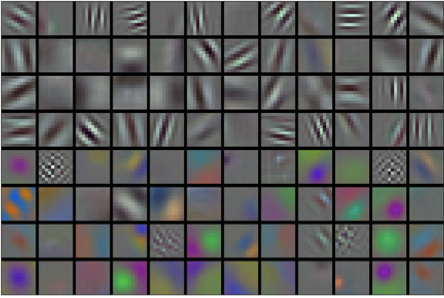
图7.1.1: AlexNet第⼀层学习到的特征抽取器。

AlexNet的更⾼层建⽴在这些底层表⽰的基础上，以表⽰更⼤的特征，如眼睛、⿐⼦、草叶等等。⽽更⾼的层
可以检测整个物体，如⼈、⻜机、狗或⻜盘。最终的隐藏神经元可以学习图像的综合表⽰，从⽽使属于不同
类别的数据易于区分。尽管⼀直有⼀群执着的研究者不断钻研，试图学习视觉数据的逐级表征，然⽽很⻓⼀
段时间⾥这些尝试都未有突破。深度卷积神经⽹络的突破出现在2012年。突破可归因于两个关键因素：数据和硬件

#### 缺少的成分：数据

包含许多特征的深度模型需要⼤量的有标签数据，才能显著优于基于凸优化的传统⽅法（如线性⽅法和核⽅
法）。然⽽，限于早期计算机有限的存储和90年代有限的研究预算，⼤部分研究只基于⼩的公开数据集。例
如，不少研究论⽂基于加州⼤学欧⽂分校（UCI）提供的若⼲个公开数据集，其中许多数据集只有⼏百⾄⼏
千张在⾮⾃然环境下以低分辨率拍摄的图像。这⼀状况在2010年前后兴起的⼤数据浪潮中得到改善。2009年，
ImageNet数据集发布，并发起ImageNet挑战赛：要求研究⼈员从100万个样本中训练模型，以区分1000个不同
类别的对象。ImageNet数据集由斯坦福教授李⻜⻜⼩组的研究⼈员开发，利⽤⾕歌图像搜索（Google Image
Search）对每⼀类图像进⾏预筛选，并利⽤亚⻢逊众包（Amazon Mechanical Turk）来标注每张图⽚的相关
类别。这种规模是前所未有的。这项被称为ImageNet的挑战赛推动了计算机视觉和机器学习研究的发展，挑
战研究⼈员确定哪些模型能够在更⼤的数据规模下表现最好

#### 缺少的成分：硬件

深度学习对计算资源要求很⾼，训练可能需要数百个迭代轮数，每次迭代都需要通过代价⾼昂的许多线性代
数层传递数据。这也是为什么在20世纪90年代⾄21世纪初，优化凸⽬标的简单算法是研究⼈员的⾸选。然⽽，
⽤GPU训练神经⽹络改变了这⼀格局。图形处理器（Graphics Processing Unit，GPU）早年⽤来加速图形处
理，使电脑游戏玩家受益。GPU可优化⾼吞吐量的4 × 4矩阵和向量乘法，从⽽服务于基本的图形任务。幸运
的是，这些数学运算与卷积层的计算惊⼈地相似。由此，英伟达（NVIDIA）和ATI已经开始为通⽤计算操作
优化gpu，甚⾄把它们作为通⽤GPU（general-purpose GPUs，GPGPU）来销售。

那么GPU⽐CPU强在哪⾥呢？

⾸先，我们深度理解⼀下中央处理器（Central Processing Unit，CPU）的核⼼。CPU的每个核⼼都拥有⾼时
钟频率的运⾏能⼒，和⾼达数MB的三级缓存（L3Cache）。它们⾮常适合执⾏各种指令，具有分⽀预测器、深
层流⽔线和其他使CPU能够运⾏各种程序的功能。然⽽，这种明显的优势也是它的致命弱点：通⽤核⼼的制
造成本⾮常⾼。它们需要⼤量的芯⽚⾯积、复杂的⽀持结构（内存接⼝、内核之间的缓存逻辑、⾼速互连等
等），⽽且它们在任何单个任务上的性能都相对较差。现代笔记本电脑最多有4核，即使是⾼端服务器也很少
超过64核，因为它们的性价⽐不⾼。

相⽐于CPU，GPU由100 ∼ 1000个⼩的处理单元组成（NVIDIA、ATI、ARM和其他芯⽚供应商之间的细节稍有
不同），通常被分成更⼤的组（NVIDIA称之为warps）。虽然每个GPU核⼼都相对较弱，有时甚⾄以低于1GHz的
时钟频率运⾏，但庞⼤的核⼼数量使GPU⽐CPU快⼏个数量级。例如，NVIDIA最近⼀代的Ampere GPU架构
为每个芯⽚提供了⾼达312 TFlops的浮点性能，⽽CPU的浮点性能到⽬前为⽌还没有超过1 TFlops。之所以有
如此⼤的差距，原因其实很简单：⾸先，功耗往往会随时钟频率呈⼆次⽅增⻓。对于⼀个CPU核⼼，假设它的
运⾏速度⽐GPU快4倍，但可以使⽤16个GPU核代替，那么GPU的综合性能就是CPU的16 × 1/4 = 4倍。其次，
GPU内核要简单得多，这使得它们更节能。此外，深度学习中的许多操作需要相对较⾼的内存带宽，⽽GPU拥
有10倍于CPU的带宽。

回到2012年的重⼤突破，当Alex Krizhevsky和Ilya Sutskever实现了可以在GPU硬件上运⾏的深度卷积神经
⽹络时，⼀个重⼤突破出现了。他们意识到卷积神经⽹络中的计算瓶颈：卷积和矩阵乘法，都是可以在硬
件上并⾏化的操作。于是，他们使⽤两个显存为3GB的NVIDIA GTX580 GPU实现了快速卷积运算。他们的创
新cuda-convnet 89 ⼏年来它⼀直是⾏业标准，并推动了深度学习热潮。

### AlexNet

2012年，AlexNet横空出世。它⾸次证明了学习到的特征可以超越⼿⼯设计的特征。它⼀举打破了计算机视
觉研究的现状。AlexNet使⽤了8层卷积神经⽹络，并以很⼤的优势赢得了2012年ImageNet图像识别挑战赛。

AlexNet和LeNet的架构⾮常相似，如 图7.1.2所⽰。注意，本书在这⾥提供的是⼀个稍微精简版本的AlexNet，
去除了当年需要两个⼩型GPU同时运算的设计特点。

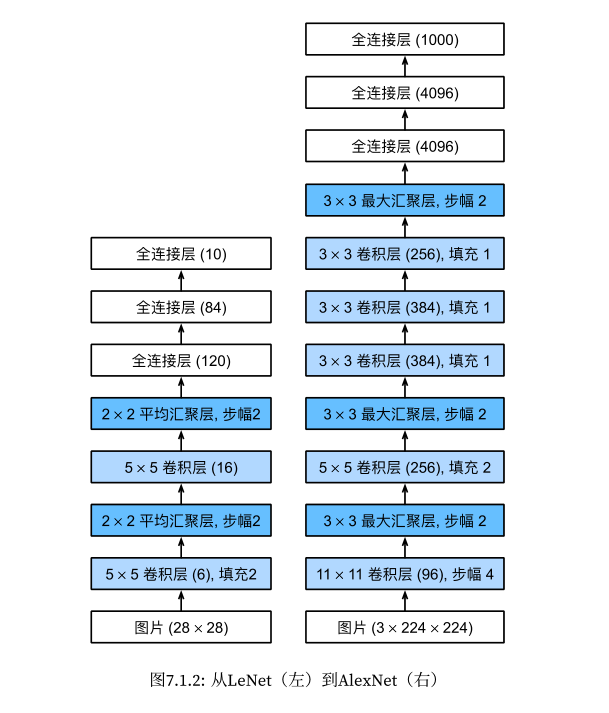

AlexNet和LeNet的设计理念⾮常相似，但也存在显著差异。

1. AlexNet⽐相对较⼩的LeNet5要深得多。AlexNet由⼋层组成：五个卷积层、两个全连接隐藏层和⼀个
全连接输出层。

2. AlexNet使⽤ReLU⽽不是sigmoid作为其激活函数。

下⾯的内容将深⼊研究AlexNet的细节。

#### 模型设计

在AlexNet的第⼀层，卷积窗⼝的形状是11×11。由于ImageNet中⼤多数图像的宽和⾼⽐MNIST图像的多10倍
以上，因此，需要⼀个更⼤的卷积窗⼝来捕获⽬标。第⼆层中的卷积窗⼝形状被缩减为5×5，然后是3×3。此
外，在第⼀层、第⼆层和第五层卷积层之后，加⼊窗⼝形状为3×3、步幅为2的最⼤汇聚层。⽽且，AlexNet的
卷积通道数⽬是LeNet的10倍。

在最后⼀个卷积层后有两个全连接层，分别有4096个输出。这两个巨⼤的全连接层拥有将近1GB的模型参数。
由于早期GPU显存有限，原版的AlexNet采⽤了双数据流设计，使得每个GPU只负责存储和计算模型的⼀半
参数。幸运的是，现在GPU显存相对充裕，所以现在很少需要跨GPU分解模型（因此，本书的AlexNet模型在
这⽅⾯与原始论⽂稍有不同）。

#### 激活函数

此外，AlexNet将sigmoid激活函数改为更简单的ReLU激活函数。⼀⽅⾯，ReLU激活函数的计算更简单，它
不需要如sigmoid激活函数那般复杂的求幂运算。另⼀⽅⾯，当使⽤不同的参数初始化⽅法时，ReLU激活函
数使训练模型更加容易。当sigmoid激活函数的输出⾮常接近于0或1时，这些区域的梯度⼏乎为0，因此反向
传播⽆法继续更新⼀些模型参数。相反，ReLU激活函数在正区间的梯度总是1。因此，如果模型参数没有正
确初始化，sigmoid函数可能在正区间内得到⼏乎为0的梯度，从⽽使模型⽆法得到有效的训练。

#### 容量控制和预处理

AlexNet通过暂退法（4.6节）控制全连接层的模型复杂度，⽽LeNet只使⽤了权重衰减。为了进⼀步扩充数
据，AlexNet在训练时增加了⼤量的图像增强数据，如翻转、裁切和变⾊。这使得模型更健壮，更⼤的样本量
有效地减少了过拟合。在 13.1节中更详细地讨论数据扩增。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
net = nn.Sequential(
    # 这里使用一个11 * 11的更大窗口来捕获对象。
    # 同时，步幅为4，以减少输出的高度和宽度。
    # 另外，输出通道的数目远大于LeNet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 减小卷积窗口，使用填充为2来使得输入与输出的高与宽一致，且增大输出通道数
    nn.Conv2d(96, 256,  kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用三个连续的卷积层和较小的卷积窗口。
    # 除了最后的卷积层，输出通道的数量进一步增加。
    # 在前面两个卷积层之后，汇聚层不用于减少输入的高度和宽度
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
    nn.Linear(6400, 4096),  nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # 最后输出层。由于这里使用Fashion-MNIST, 所以用类别数为10， 而非论文中的1000
    nn.Linear(4096, 10))

我们构造⼀个⾼度和宽度都为224的单通道数据，来观察每⼀层输出的形状。它与 图7.1.2中的AlexNet架构相
匹配。

In [3]:
X = torch.rand(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

### 读取数据

尽管原⽂中AlexNet是在ImageNet上进⾏训练的，但本书在这⾥使⽤的是Fashion-MNIST数据集。因为即使在
现代GPU上，训练ImageNet模型，同时使其收敛可能需要数⼩时或数天的时间。将AlexNet直接应⽤于Fashion-
MNIST的⼀个问题是，Fashion-MNIST图像的分辨率（28×28像素）低于ImageNet图像。为了解决这个问题，
我们将它们增加到224 × 224（通常来讲这不是⼀个明智的做法，但在这⾥这样做是为了有效使⽤AlexNet架
构）。这⾥需要使⽤d2l.load_data_fashion_mnist函数中的resize参数执⾏此调整。

In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

### 训练AlexNet

现在AlexNet可以开始被训练了。与 6.6节中的LeNet相⽐，这⾥的主要变化是使⽤更⼩的学习速率训练，这
是因为⽹络更深更⼴、图像分辨率更⾼，训练卷积神经⽹络就更昂贵。

KeyboardInterrupt: 

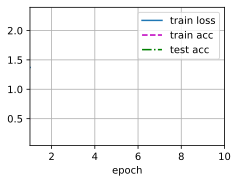

In [5]:
%%time
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

⼩结

• AlexNet的架构与LeNet相似，但使⽤了更多的卷积层和更多的参数来拟合⼤规模的ImageNet数据集。

• 今天，AlexNet已经被更有效的架构所超越，但它是从浅层⽹络到深层⽹络的关键⼀步。

• 尽管AlexNet的代码只⽐LeNet多出⼏⾏，但学术界花了很多年才接受深度学习这⼀概念，并应⽤其出
⾊的实验结果。这也是由于缺乏有效的计算⼯具。

• Dropout、ReLU和预处理是提升计算机视觉任务性能的其他关键步骤。

## 使用块网络（VGG）

虽然AlexNet证明深层神经⽹络卓有成效，但它没有提供⼀个通⽤的模板来指导后续的研究⼈员设计新的⽹
络。在下⾯的⼏个章节中，我们将介绍⼀些常⽤于设计深层神经⽹络的启发式概念。

与芯⽚设计中⼯程师从放置晶体管到逻辑元件再到逻辑块的过程类似，神经⽹络架构的设计也逐渐变得更加
抽象。研究⼈员开始从单个神经元的⻆度思考问题，发展到整个层，现在⼜转向块，重复层的模式。

使⽤块的想法⾸先出现在⽜津⼤学的视觉⼏何组（visual geometry group） 91 的VGG⽹络中。通过使⽤循环
和⼦程序，可以很容易地在任何现代深度学习框架的代码中实现这些重复的架构。

### VGG块

经典卷积神经⽹络的基本组成部分是下⾯的这个序列：

1. 带填充以保持分辨率的卷积层；

2. ⾮线性激活函数，如ReLU；

3. 汇聚层，如最⼤汇聚层。

⽽⼀个VGG块与之类似，由⼀系列卷积层组成，后⾯再加上⽤于空间下采样的最⼤汇聚层。在最初的VGG论
⽂中 (Simonyan and Zisserman, 2014)，作者使⽤了带有3×3卷积核、填充为1（保持⾼度和宽度）的卷积层，
和带有2 × 2汇聚窗⼝、步幅为2（每个块后的分辨率减半）的最⼤汇聚层。在下⾯的代码中，我们定义了⼀
个名为vgg_block的函数来实现⼀个VGG块。

In [4]:
# 该函数有三个参数，分别对应于卷积层的数量num_convs、输⼊通道的数量in_channels 和输出通道的数
# 量out_channels.
import torch
from torch import nn
from d2l import torch as d2l

In [5]:
def vgg_block(num_convs, in_channels, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                                kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

### VGG网络

与AlexNet、LeNet⼀样，VGG⽹络可以分为两部分：第⼀部分主要由卷积层和汇聚层组成，第⼆部分由全连
接层组成。如 图7.2.1中所⽰。
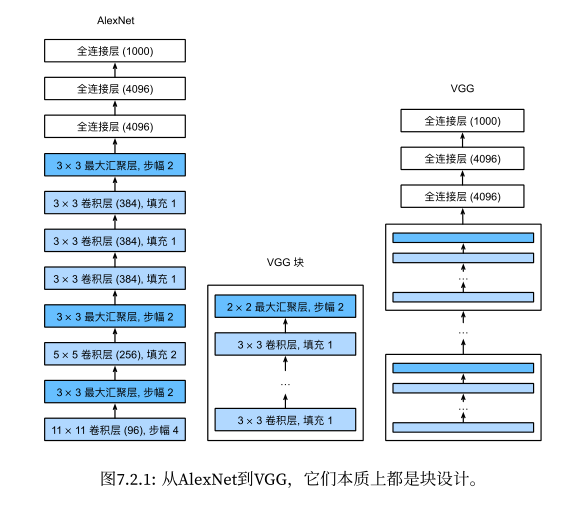

VGG神经⽹络连接 图7.2.1的⼏个VGG块（在vgg_block函数中定义）。其中有超参数变量conv_arch。该变量
指定了每个VGG块⾥卷积层个数和输出通道数。全连接模块则与AlexNet中的相同。

原始VGG⽹络有5个卷积块，其中前两个块各有⼀个卷积层，后三个块各包含两个卷积层。第⼀个模块有64个
输出通道，每个后续模块将输出通道数量翻倍，直到该数字达到512。由于该⽹络使⽤8个卷积层和3个全连接
层，因此它通常被称为VGG-11。

In [7]:
conv_arch = ((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))

In [8]:
# 下面的代码实现了VGG-11。可以通过在conv_arch上执行for循环来简单实现
def vgg(conv_arch):
    conv_blks = []
    in_channels = 1
    # 卷积层部分
    for (num_convs, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs, in_channels, out_channels))
        in_channels = out_channels
    return nn.Sequential(
        *conv_blks, nn.Flatten(),
        # 全连接层
        nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

In [9]:
net = vgg(conv_arch)

In [10]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


正如从代码中所看到的，我们在每个块的⾼度和宽度减半，最终⾼度和宽度都为7。最后再展平表⽰，送⼊全
连接层处理。

### 训练模型

由于VGG-11⽐AlexNet计算量更⼤，因此我们构建了⼀个通道数较少的⽹络，⾜够⽤于训练Fashion-MNIST数
据集。

In [11]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]

In [12]:
net = vgg(small_conv_arch)

In [13]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 16, 112, 112])
Sequential output shape:	 torch.Size([1, 32, 56, 56])
Sequential output shape:	 torch.Size([1, 64, 28, 28])
Sequential output shape:	 torch.Size([1, 128, 14, 14])
Sequential output shape:	 torch.Size([1, 128, 7, 7])
Flatten output shape:	 torch.Size([1, 6272])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [14]:
# 除了使用略高的学习率外，模型训练过程与 7.1节中的AlexNet类似。

KeyboardInterrupt: 

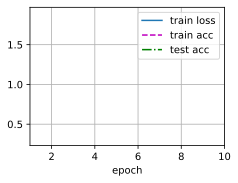

In [15]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

⼩结

• VGG-11使⽤可复⽤的卷积块构造⽹络。不同的VGG模型可通过每个块中卷积层数量和输出通道数量的
差异来定义。

• 块的使⽤导致⽹络定义的⾮常简洁。使⽤块可以有效地设计复杂的⽹络。

• 在VGG论⽂中，Simonyan和Ziserman尝试了各种架构。特别是他们发现深层且窄的卷积（即3×3）⽐
较浅层且宽的卷积更有效。

## 网络中的网络（NiN）

LeNet、AlexNet和VGG都有⼀个共同的设计模式：通过⼀系列的卷积层与汇聚层来提取空间结构特征；然后
通过全连接层对特征的表征进⾏处理。AlexNet和VGG对LeNet的改进主要在于如何扩⼤和加深这两个模块。
或者，可以想象在这个过程的早期使⽤全连接层。然⽽，如果使⽤了全连接层，可能会完全放弃表征的空间结
构。⽹络中的⽹络（NiN）提供了⼀个⾮常简单的解决⽅案：在每个像素的通道上分别使⽤多层感知机 (Lin
et al., 2013)

### NiN块

回想⼀下，卷积层的输⼊和输出由四维张量组成，张量的每个轴分别对应样本、通道、⾼度和宽度。另外，
全连接层的输⼊和输出通常是分别对应于样本和特征的⼆维张量。NiN的想法是在每个像素位置（针对每个
⾼度和宽度）应⽤⼀个全连接层。如果我们将权重连接到每个空间位置，我们可以将其视为1 × 1卷积层（如
6.4节中所述），或作为在每个像素位置上独⽴作⽤的全连接层。从另⼀个⻆度看，即将空间维度中的每个像
素视为单个样本，将通道维度视为不同特征（feature）。

图7.3.1说明了VGG和NiN及它们的块之间主要架构差异。NiN块以⼀个普通卷积层开始，后⾯是两个1 × 1的
卷积层。这两个1 × 1卷积层充当带有ReLU激活函数的逐像素全连接层。第⼀层的卷积窗⼝形状通常由⽤⼾
设置。随后的卷积窗⼝形状固定为1 × 1。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

### NiN模型

最初的NiN⽹络是在AlexNet后不久提出的，显然从中得到了⼀些启⽰。NiN使⽤窗⼝形状为11×11、5×5和3×
3的卷积层，输出通道数量与AlexNet中的相同。每个NiN块后有⼀个最⼤汇聚层，汇聚窗⼝形状为3 × 3，步
幅为2。

NiN和AlexNet之间的⼀个显著区别是NiN完全取消了全连接层。相反，NiN使⽤⼀个NiN块，其输出通道数等
于标签类别的数量。最后放⼀个全局平均汇聚层（global average pooling layer），⽣成⼀个对数⼏率（logits）。
NiN设计的⼀个优点是，它显著减少了模型所需参数的数量。然⽽，在实践中，这种设计有时会增加训练模
型的时间。

In [3]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # 标签类别数是10
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    # 将四维的输出转成二维的输出，其形状为（批量大小，10）
    nn.Flatten())

In [4]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 训练模型

和以前⼀样，我们使⽤Fashion-MNIST来训练模型。训练NiN与训练AlexNet、VGG时相似。

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

⼩结

• NiN使⽤由⼀个卷积层和多个1×1卷积层组成的块。该块可以在卷积神经⽹络中使⽤，以允许更多的每
像素⾮线性。

• NiN去除了容易造成过拟合的全连接层，将它们替换为全局平均汇聚层（即在所有位置上进⾏求和）。该
汇聚层通道数量为所需的输出数量（例如，Fashion-MNIST的输出为10）。

• 移除全连接层可减少过拟合，同时显著减少NiN的参数。

• NiN的设计影响了许多后续卷积神经⽹络的设计。

## 含并行连结的网络（GoogLeNet)

在2014年的ImageNet图像识别挑战赛中，⼀个名叫GoogLeNet (Szegedy et al., 2015)的⽹络架构⼤放异彩。
GoogLeNet吸收了NiN中串联⽹络的思想，并在此基础上做了改进。这篇论⽂的⼀个重点是解决了什么样
⼤⼩的卷积核最合适的问题。毕竟，以前流⾏的⽹络使⽤⼩到1×1，⼤到11×11的卷积核。本⽂的⼀个观点
是，有时使⽤不同⼤⼩的卷积核组合是有利的。本节将介绍⼀个稍微简化的GoogLeNet版本：我们省略了⼀
些为稳定训练⽽添加的特殊特性，现在有了更好的训练⽅法，这些特性不是必要的。

### Inception块

在GoogLeNet中，基本的卷积块被称为Inception块（Inception block）。这很可能得名于电影《盗梦空间》（In-
ception），因为电影中的⼀句话“我们需要⾛得更深”（“We need to go deeper”）。

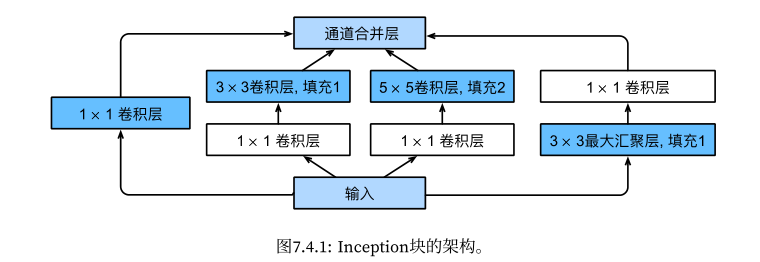

如 图7.4.1所⽰，Inception块由四条并⾏路径组成。前三条路径使⽤窗⼝⼤⼩为1×1、3×3和5×5的卷积层，
从不同空间⼤⼩中提取信息。中间的两条路径在输⼊上执⾏1 × 1卷积，以减少通道数，从⽽降低模型的复杂
性。第四条路径使⽤3 × 3最⼤汇聚层，然后使⽤1 × 1卷积层来改变通道数。这四条路径都使⽤合适的填充
来使输⼊与输出的⾼和宽⼀致，最后我们将每条线路的输出在通道维度上连结，并构成Inception块的输出。
在Inception块中，通常调整的超参数是每层输出通道数。

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [3]:
class Inception(nn.Module):
    # c1--c4是每条路径的输出通道数
    def __init__(self, in_channels, c1, c2, c3, c4, **kwargs):
        super(Inception, self).__init__(**kwargs)
        
        # 线路1，单1×1卷积层
        self.p1_1 = nn.Conv2d(in_channels, c1, kernel_size=1)
        
        # 线路2，1×1卷积层后接3×3卷积层
        self.p2_1 = nn.Conv2d(in_channels, c2[0], kernel_size=1)
        self.p2_2 = nn.Conv2d(c2[0], c2[1], kernel_size=3, padding=1)
        
        # 线路3，1×1卷积层后接5×5卷积层
        self.p3_1 = nn.Conv2d(in_channels, c3[0], kernel_size=1)
        self.p3_2 = nn.Conv2d(c3[0], c3[1], kernel_size=5, padding=2)
        
        # 线路4，3×3最大汇聚层后接1×1卷积层
        self.p4_1 = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.p4_2 = nn.Conv2d(in_channels, c4, kernel_size=1)
        
    def forward(self, x):
        p1 = F.relu(self.p1_1(x))
        p2 = F.relu(self.p2_2(F.relu(self.p2_1(x))))
        p3 = F.relu(self.p3_2(F.relu(self.p3_1(x))))
        p4 = F.relu(self.p4_2(self.p4_1(x)))
        # 在通道维度上连结输出
        return torch.cat((p1, p2, p3, p4), dim=1)

那么为什么GoogLeNet这个⽹络如此有效呢？⾸先我们考虑⼀下滤波器（filter）的组合，它们可以⽤各种滤
波器尺⼨探索图像，这意味着不同⼤⼩的滤波器可以有效地识别不同范围的图像细节。同时，我们可以为不
同的滤波器分配不同数量的参数。

### GoogLeNet模型

如 图7.4.2所⽰，GoogLeNet⼀共使⽤9个Inception块和全局平均汇聚层的堆叠来⽣成其估计值。Inception块
之间的最⼤汇聚层可降低维度。第⼀个模块类似于AlexNet和LeNet，Inception块的组合从VGG继承，全局平
均汇聚层避免了在最后使⽤全连接层。

如 图7.4.2所⽰，GoogLeNet⼀共使⽤9个Inception块和全局平均汇聚层的堆叠来⽣成其估计值。Inception块
之间的最⼤汇聚层可降低维度。第⼀个模块类似于AlexNet和LeNet，Inception块的组合从VGG继承，全局平
均汇聚层避免了在最后使⽤全连接层。

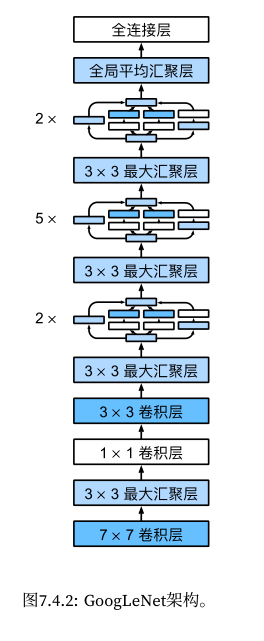

In [4]:
# 现在，我们逐⼀实现GoogLeNet的每个模块。第⼀个模块使⽤64个通道、7 × 7卷积层。
b1 = nn.Sequential(nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [5]:
# 第⼆个模块使⽤两个卷积层：第⼀个卷积层是64个通道、1×1卷积层；第⼆个卷积层使⽤将通道数量增加三
# 倍的3 × 3卷积层。这对应于Inception块中的第⼆条路径。
b2 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=1),
                   nn.ReLU(),
                   nn.Conv2d(64, 192, kernel_size=3, padding=1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [6]:
# 第三个模块串联两个完整的Inception块。第⼀个Inception块的输出通道数为64 + 128 + 32 + 32 = 256，四
# 个路径之间的输出通道数量⽐为64 : 128 : 32 : 32 = 2 : 4 : 1 : 1。第⼆个和第三个路径⾸先将输⼊通道的数量
# 分别减少到96/192 = 1/2和16/192 = 1/12，然后连接第⼆个卷积层。第⼆个Inception块的输出通道数增加
# 到128 + 192 + 96 + 64 = 480，四个路径之间的输出通道数量⽐为128 : 192 : 96 : 64 = 4 : 6 : 3 : 2。第⼆条和
# 第三条路径⾸先将输⼊通道的数量分别减少到128/256 = 1/2和32/256 = 1/8。
b3 = nn.Sequential(Inception(192, 64, (96, 128), (16, 32), 32),
                   Inception(256, 128, (128, 192), (32, 96), 64),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))                

In [7]:
# 第四模块更加复杂，它串联了5个Inception块，其输出通道数分别是192+208+48+64 = 512、160+224+
# 64 + 64 = 512、128 + 256 + 64 + 64 = 512、112 + 288 + 64 + 64 = 528和256 + 320 + 128 + 128 = 832。这些
# 路径的通道数分配和第三模块中的类似，⾸先是含3×3卷积层的第⼆条路径输出最多通道，其次是仅含1×1卷
# 积层的第⼀条路径，之后是含5×5卷积层的第三条路径和含3×3最⼤汇聚层的第四条路径。其中第⼆、第三条
# 路径都会先按⽐例减⼩通道数。这些⽐例在各个Inception块中都略有不同。
b4 = nn.Sequential(Inception(480, 192, (96, 208), (16, 48), 64),
                   Inception(512, 160, (112, 224), (24,  64), 64),
                   Inception(512, 128, (128, 256), (24, 64), 64),
                   Inception(512, 112, (144, 288), (32, 64), 64),
                   Inception(528, 256, (160, 320), (32, 128), 128),
                   nn.MaxPool2d(kernel_size=3, stride=2, padding=1))

In [8]:
# 第五模块包含输出通道数为256 + 320 + 128 + 128 = 832和384 + 384 + 128 + 128 = 1024的两个Inception块。
# 其中每条路径通道数的分配思路和第三、第四模块中的⼀致，只是在具体数值上有所不同。需要注意的是，第
# 五模块的后⾯紧跟输出层，该模块同NiN⼀样使⽤全局平均汇聚层，将每个通道的⾼和宽变成1。最后我们将
# 输出变成⼆维数组，再接上⼀个输出个数为标签类别数的全连接层。
b5 = nn.Sequential(Inception(832, 256, (160, 320), (32, 128), 128),
                   Inception(832, 384, (192, 384), (48, 128), 128),
                   nn.AdaptiveAvgPool2d((1, 1)),
                   nn.Flatten())

In [9]:
net = nn.Sequential(b1, b2, b3, b4, b5, nn.Linear(1024, 10))

GoogLeNet模型的计算复杂，⽽且不如VGG那样便于修改通道数。为了使Fashion-MNIST上的训练短⼩精悍，
我们将输⼊的⾼和宽从224降到96，这简化了计算。下⾯演⽰各个模块输出的形状变化。

In [10]:
X = torch.rand(size=(1, 1, 96, 96))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 24, 24])
Sequential output shape:	 torch.Size([1, 192, 12, 12])
Sequential output shape:	 torch.Size([1, 480, 6, 6])
Sequential output shape:	 torch.Size([1, 832, 3, 3])
Sequential output shape:	 torch.Size([1, 1024])
Linear output shape:	 torch.Size([1, 10])


### 训练模型

In [ ]:
# 和以前⼀样，我们使⽤Fashion-MNIST数据集来训练我们的模型。在训练之前，我们将图⽚转换为96 × 96分
# 辨率。
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

⼩结

• Inception块相当于⼀个有4条路径的⼦⽹络。它通过不同窗⼝形状的卷积层和最⼤汇聚层来并⾏抽取
信息，并使⽤1×1卷积层减少每像素级别上的通道维数从⽽降低模型复杂度。

• GoogLeNet将多个设计精细的Inception块与其他层（卷积层、全连接层）串联起来。其中Inception块
的通道数分配之⽐是在ImageNet数据集上通过⼤量的实验得来的。

• GoogLeNet和它的后继者们⼀度是ImageNet上最有效的模型之⼀：它以较低的计算复杂度提供了类似
的测试精度。